# PROYECTO SPRINT 13

## Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

1. Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.

2. Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.

3. Analizar los factores que más impactan la pérdida.

4. Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al   cliente:

- identificar a los grupos objetivo;

- sugerir medidas para reducir la rotación;

- describir cualquier otro patrón que observes con respecto a la interacción con los    clientes.

## 1. Descargar los datos 

In [1]:
# Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# Leer el archivo de datos

datos = pd.read_csv('/datasets/gym_churn_us.csv')

## 2. Análisis exploratorio de datos (EDA)

### 2.1 Observa el dataset, caracteristicas ausentes y valores promedio y la desviación estándar.

In [3]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
datos.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
datos.shape

(4000, 14)

In [6]:
datos.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


No se observan valores ausentes.

### 2.2 Observa los valores medios de las características en dos grupos

In [7]:
datos.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás
</div>

### 2.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [8]:
def graficos(df, var_obj, caracteristicas):
    '''
    Funcion para graficar Histogramas de barras 
    y distribuciones de caracteristicas para aquellas 
    personas que se fueron y las que se quedaron
    '''
    df_new = df.copy()
    df_new[caracteristicas] = datos[caracteristicas] # Asegurarse que el df este correctamente definido

    # Definir la paleta de colores para los grupos
    grupos = df[var_obj].unique()
    color = sns.color_palette('dark', len(grupos))           # Paleta de colores
    dic_color = dict(zip(grupos, color))  # Asignar un color a cada grupo

    for carac in caracteristicas:
        plt.figure(figsize=(5,4))
        for x in df[var_obj].unique():
            sns.histplot(
                data = df[df[var_obj] == x][carac],
                label = '{} = {}'.format(var_obj, str(x)),
                bins = 10,
                color = dic_color[x], # Asignar color
                alpha = 0.5,              # Transparencia 
                kde = True                # Añadir curva de distribucion  
            )
        plt.title(carac)
        plt.legend()
        plt.show()

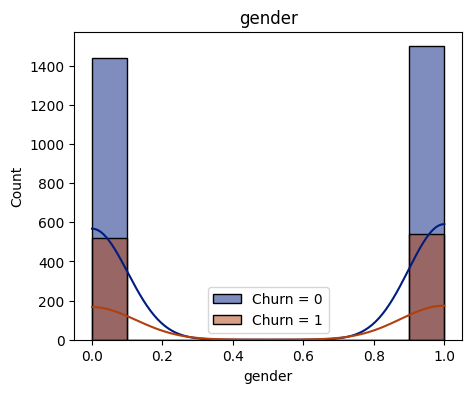

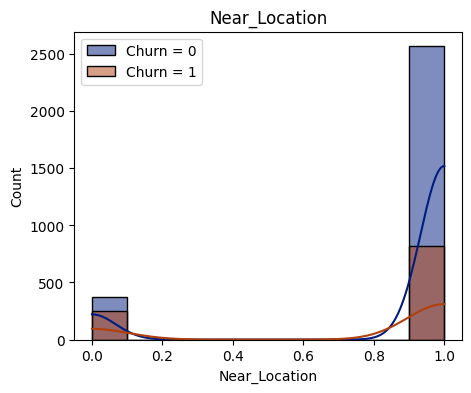

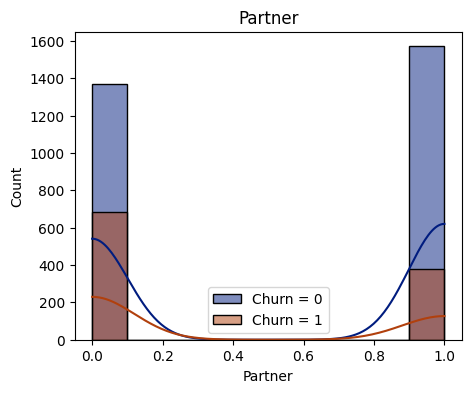

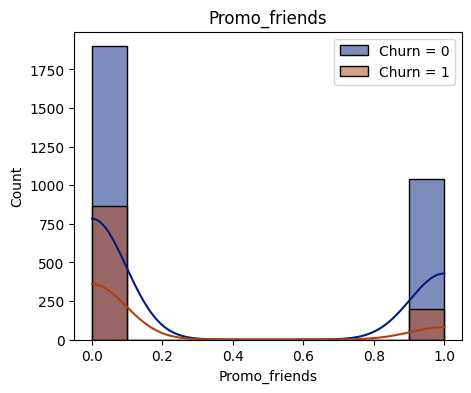

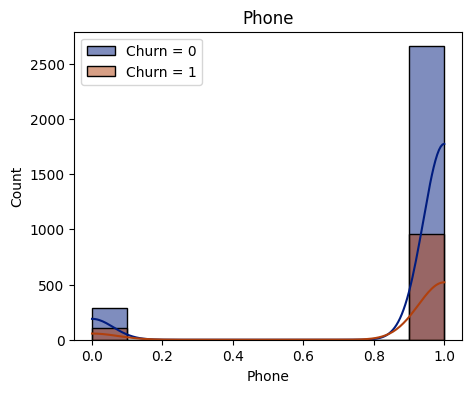

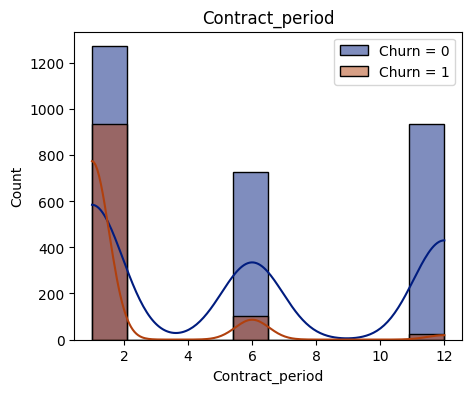

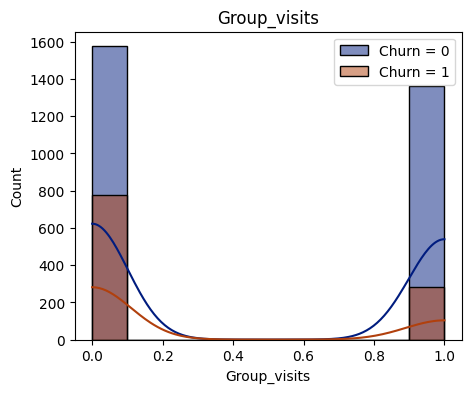

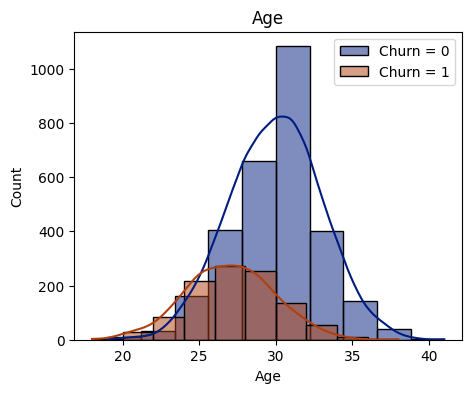

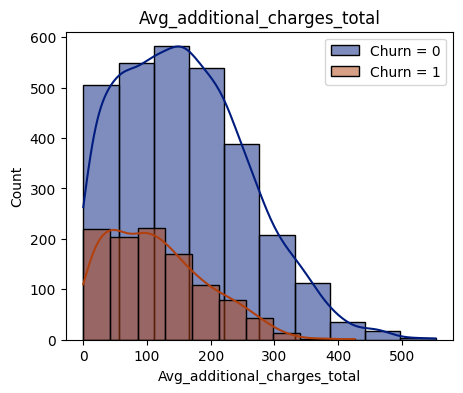

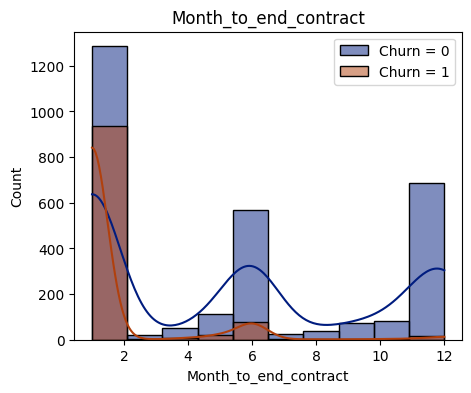

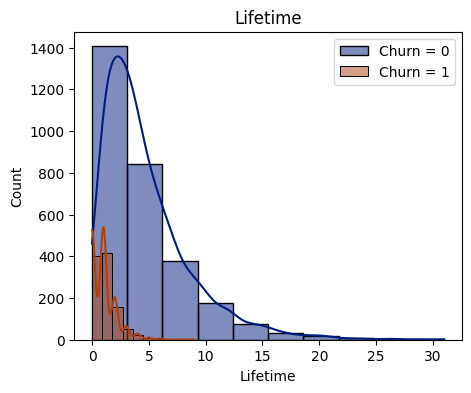

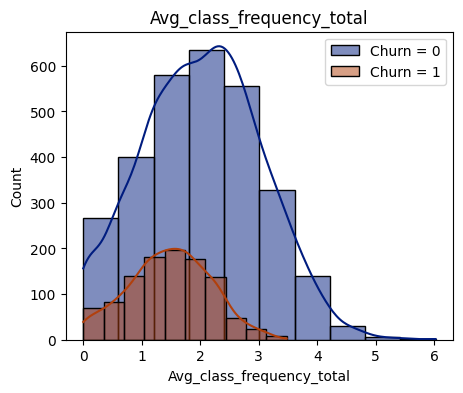

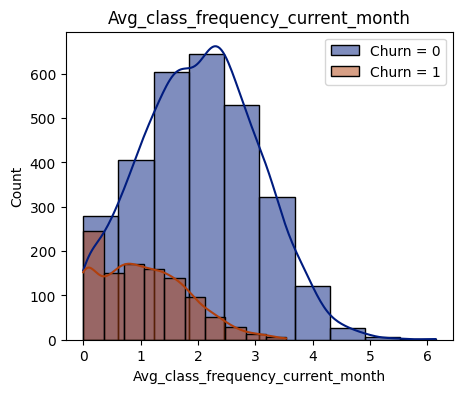

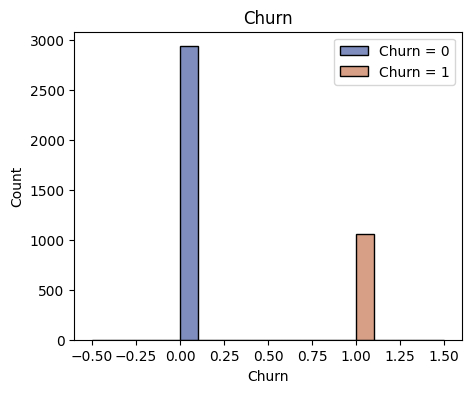

In [9]:
# Llamado de la funcion para graficar
graficos(datos, 'Churn', datos.columns)

Las caracteristicas binarias no dejan muy claro que significa el 0 y que significa el 1 , no se especifica en la descripcion de los datos y no hay una forma muy precisa de decifrarlo respecto con los demas datos.

- Hay mas cantidad de personas que se van cuando hacen el contrado por solo 1 mes, a diferencia de los que hacen contrato por 6 mese o 1 año.
- Con respecto a la edad, hay una leve diferencia donde se ve que las personas un poco mas jovenes se van mas que las personas con mas edad, la edad entre la que hay una mayor taza de cancelacion es entre los 24 y 30 años.
- Las personas que iban de 0 a 1 dias por semana tienen una tasa de cancelacion mas alta que los que iban en promedio de dos dias en adelante.
- Los clientes nuevos suelen irse con mas facilidad que los que llevan mas tiempo, los primeros dos meses son cruciales para la retencion, ya que son los meses en los que se van mas clientes.

### 2.4 Matriz de correlación 

In [10]:
# Matriz de correlacion
m_corr = datos.corr()
m_corr

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


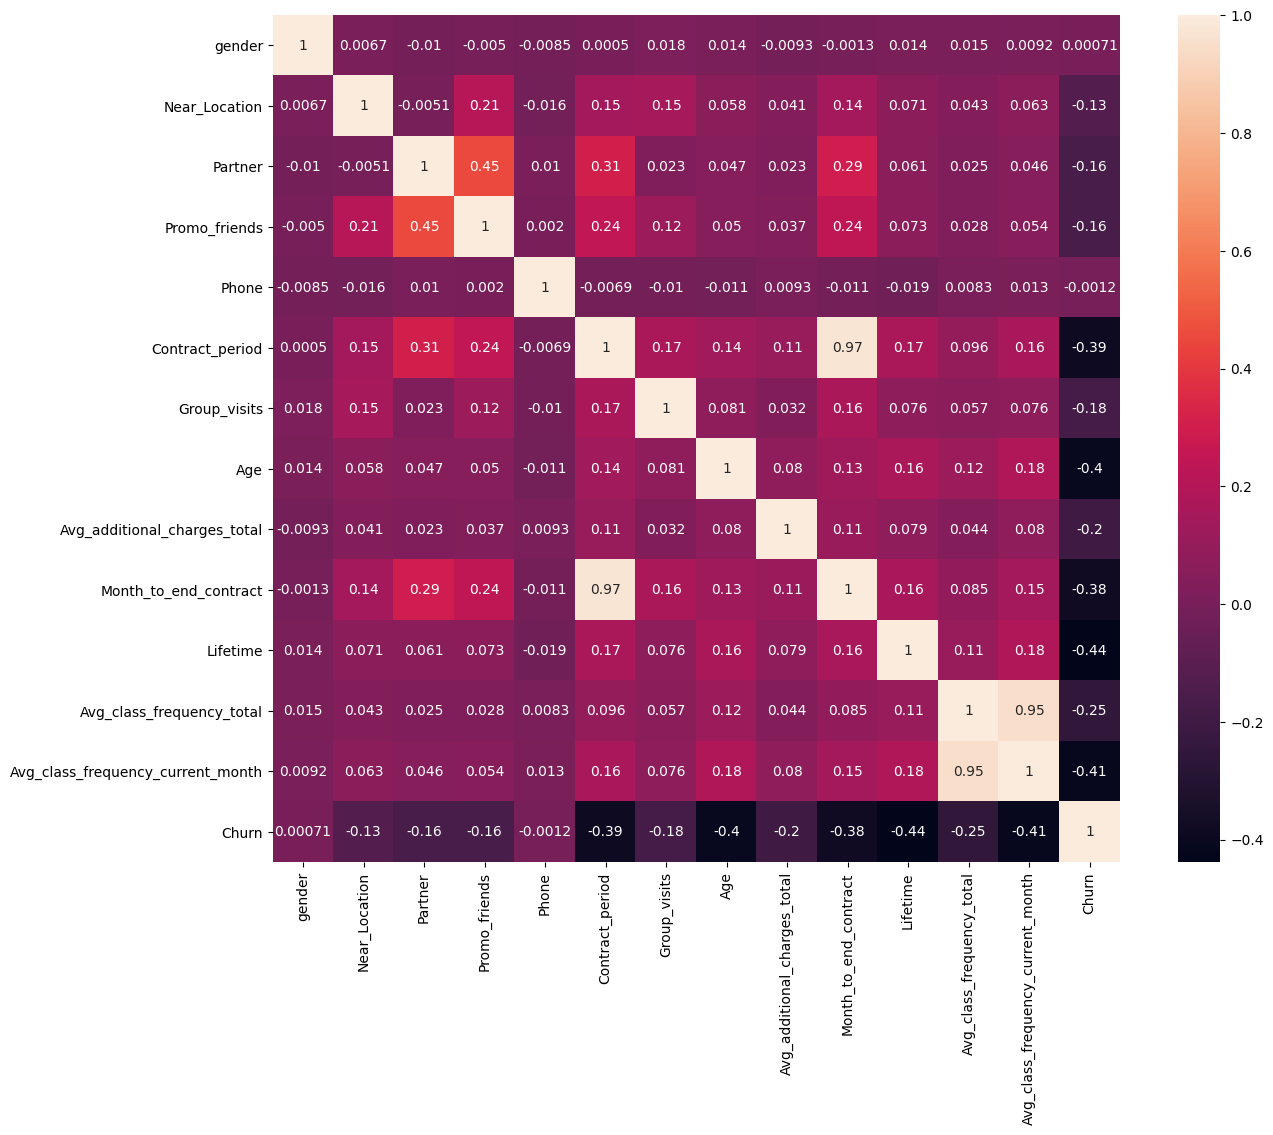

In [11]:
# Mapa de calor
plt.figure(figsize=(15,11))
sns.heatmap(m_corr, annot=True, square=True)
plt.show()

- Las caracterisiticas ***lifetime*, *Avg_class_frequency_current_month*, *Age*, *Contract_period* y *Month_to_end_contract*** son las caracteristicas que tienen una correlacion mas fuerte con la variable objetivo *Churn*, esta correlacion es negativa, lo que significa que si la variable caracteristica aumenta, la probabilidad de cancelacion disminuye.

- Se puede observar que algunas variables tienen una fuerte correlacion entre si como lo son ***Avg_class_frequency_current_month*** y ***Avg_class_frequency_total***, ***Contract_period*** y ***Month_to_end_contract***. Esto puede llegar a ser un problema para la prediccion dependiendo el modelo que se utilice, se podrian eliminar algunas dependiendo que tan fuerte sea su  correlacion con la variable objetivo ***Churn***.

## 3. Modelo para predecir la cancelación de usuarios.

### 3.1 Divicion los datos en conjuntos de entrenamiento y validación.

In [12]:
# Divicion de  los datos en matriz de caracteristicas X y variable objetivo y.
X = datos.drop(['Churn'], axis=1)
y = datos['Churn']

In [13]:
# divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.2 Entrena el modelo en el set de entrenamiento con dos métodos:
### - regresión logística
### - bosque aleatorio.

In [14]:
# Estandarizar los datos para usar el metodo de regresion logistica
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [15]:
# Entrenar modelo con el metodo de regresion logistica
mod_reg_log = LogisticRegression()
mod_reg_log.fit(X_train_st, y_train)
y_predic_reg_log = mod_reg_log.predict(X_test_st)
#y_proba_reg_log = mod_reg_log.predict_proba(X_test_st)[:, 1]

In [16]:
# Entrenar modelo con el metodo de bosque aleatorio
mod_bos_ale = RandomForestClassifier()
mod_bos_ale.fit(X_train, y_train)
y_predic_bos_ale = mod_bos_ale.predict(X_test)
#y_proba_bos_ale = mod_bos_ale.predict_proba(X_test_st)[:, 1]

### 3.3 Evaluar la exactitud, precisión y recall para ambos modelos utilizando los datos de validación.

In [17]:
# Metricas para el modelo de regresion logistica
print('La Exactitud del modelo de regresion logistica es: {:.2f}'.format(accuracy_score(y_test, y_predic_reg_log)))
print('La precision del modelo de regresion logistica es: {:.2f}'.format(precision_score(y_test, y_predic_reg_log)))
print('La Sensibilidad del modelo de regresion logistica es: {:.2f}'.format(recall_score(y_test, y_predic_reg_log)))

La Exactitud del modelo de regresion logistica es: 0.92
La precision del modelo de regresion logistica es: 0.85
La Sensibilidad del modelo de regresion logistica es: 0.83


In [18]:
# Metricas para el modelo de bosque aleatorio
print('La Exactitud del modelo de bosque aleatorio es: {:.2f}'.format(accuracy_score(y_test, y_predic_bos_ale)))
print('La precision del modelo de bosque aleatorio es: {:.2f}'.format(precision_score(y_test, y_predic_bos_ale)))
print('La Sensibilidad del modelo de bosque aleatorio es: {:.2f}'.format(recall_score(y_test, y_predic_bos_ale)))

La Exactitud del modelo de bosque aleatorio es: 0.92
La precision del modelo de bosque aleatorio es: 0.84
La Sensibilidad del modelo de bosque aleatorio es: 0.82


El modelo de ***regresión logística*** dio mejores resultados que el de ***bosque aleatorio*** en las 3 metricas, pero la diferencia entre los dos modelos es minima. Teniendo en cuenta estas metricas se podria decir que los dos modelos funcionan bien.


## 4. Crear clústeres de usuarios/as

### 4.1 Estandariza los datos.

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(datos.drop(['Churn'], axis=1))

### 4.2  matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.

In [20]:
# Matriz de distancias
linked= linkage(X_sc, method='ward')

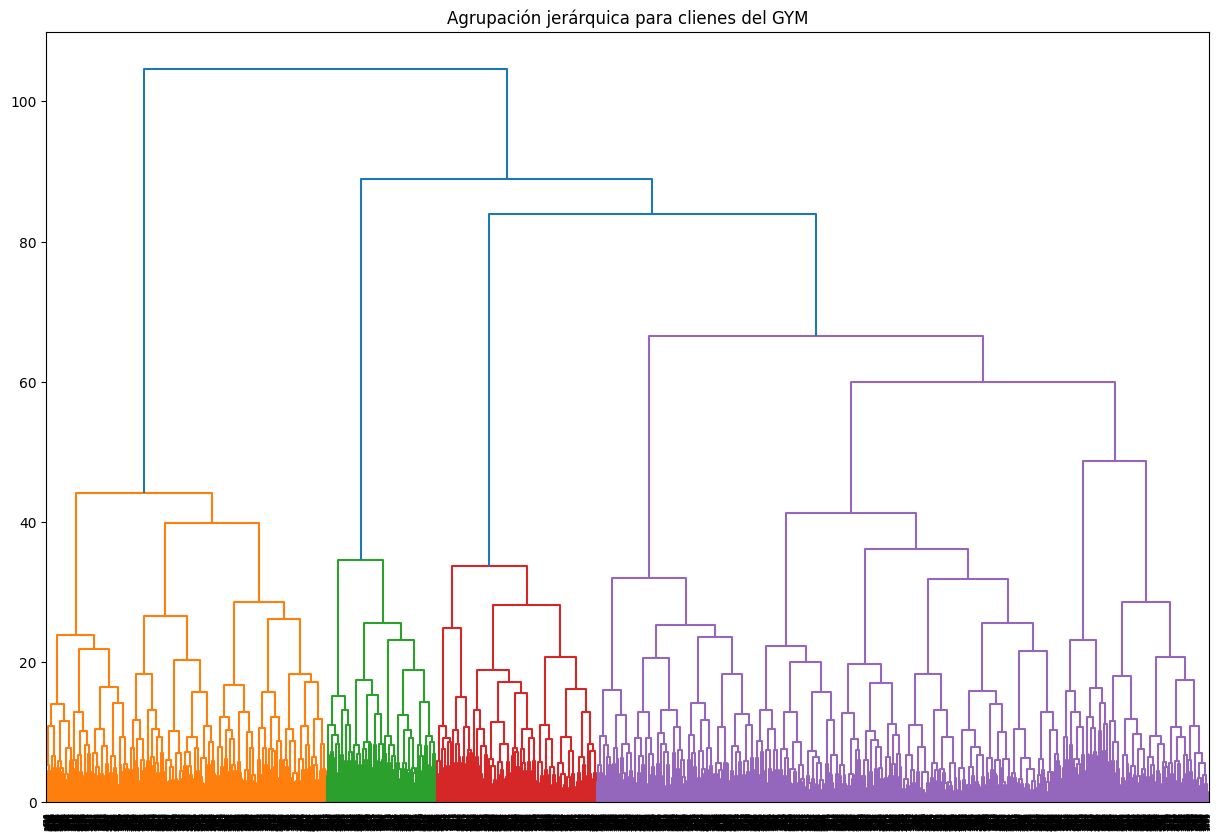

In [21]:
# Dendrograma
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para clienes del GYM')
plt.show()

Según el dendrograma los datos se deben dividir en **4 clústeres**.

### 4.3 Entrenar el modelo de clustering con el algortimo K-means y predice los clústeres de clientes

In [22]:
# Entrenar el modelo
km = KMeans(n_clusters = 5) # establecer el número de clústeres en 5

In [23]:
# Predecir los clústeres de clientes
labels = km.fit_predict(X_sc)

### 4.4 Valores medios de característica para los clústeres.

In [24]:
# Crear columna con las etiquetas de los clústeres
datos['cluster_km'] = labels

In [25]:
datos.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.495050,0.000000,0.463366,0.079208,1.0,2.374257,0.217822,28.465347,135.224414,2.219802,2.809901,1.656137,1.472887,0.443564
2,0.563464,0.975089,0.341637,0.221827,1.0,2.559905,0.472123,30.132859,161.762727,2.361803,4.919336,2.821051,2.816740,0.072361
3,0.486356,1.000000,0.356340,0.241573,1.0,1.964687,0.341091,28.152488,130.885172,1.871589,2.405297,1.237525,1.000927,0.517657
4,0.498039,0.960784,0.783333,0.576471,1.0,10.858824,0.540196,29.973529,161.150316,9.924510,4.720588,2.003826,1.997334,0.027451


No se observa una diferencia significativa entre los grupos, algunas de las mas notables son:
- En la caracteristica ***Near_Location*** el **grupo 2** esta en **0** lo que podria indicar que todos los clientes de este grupo viven lejos del GYM.
- En el **grupo 0 y 1** estan los clientes mas leales que tienen promedio mayor en la caracteristica ***Lifetime*** y en el **grupo 4** estan las personas con el promedio mas bajo para esta caracteristica.
- El grupo con los clientes mas activos estan en el **grupo 0 y 1** con un ***Avg_additional_charges_total*** un poco mas alto que los demas.
- El **grupo 4** tiene es el grupo con el ***Contract_period*** mas bajo, lo que podria indicar una alta probabilidad de cancelacion en este grupo y el **grupo 1** es el que tiene  esta caracteristica con el valor mas alto.

### 4.5 Trazar distribuciones de características para los clústeres.

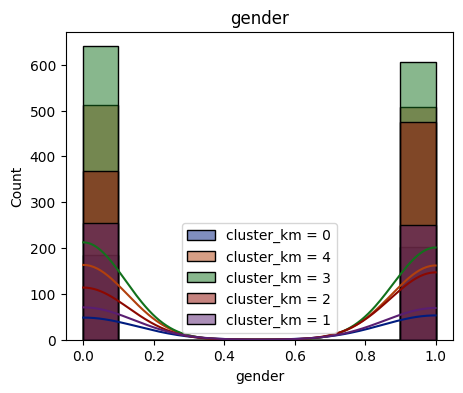

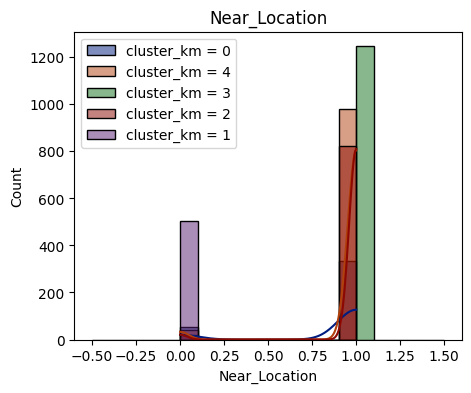

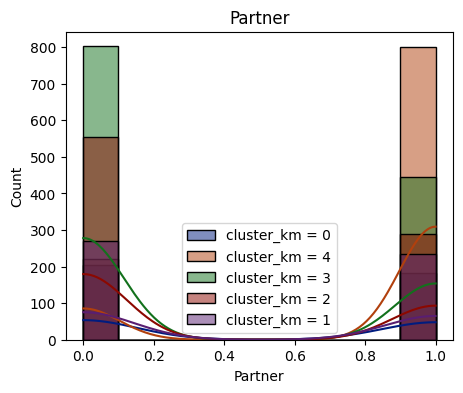

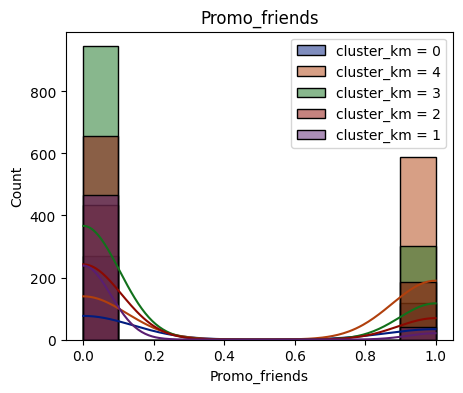

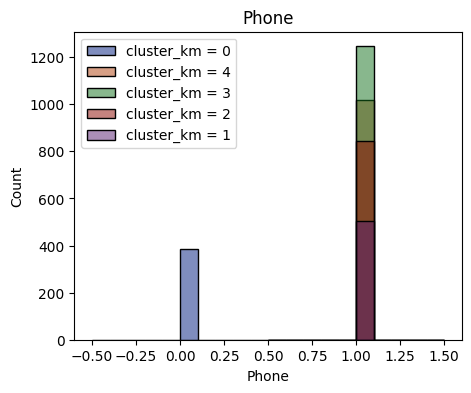

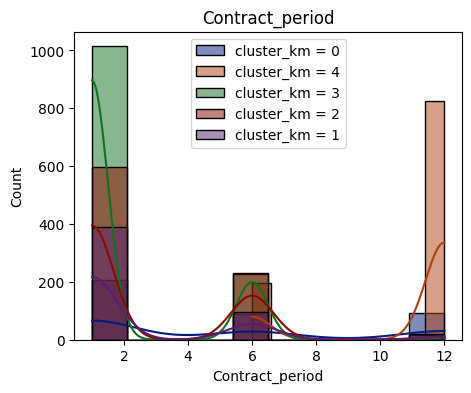

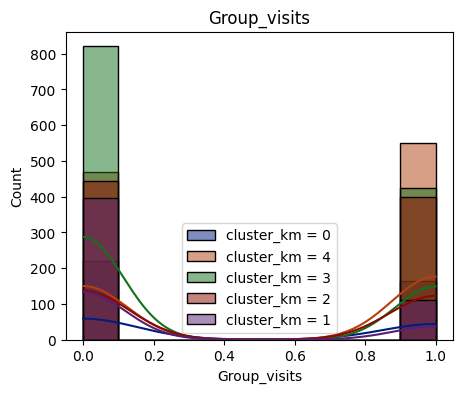

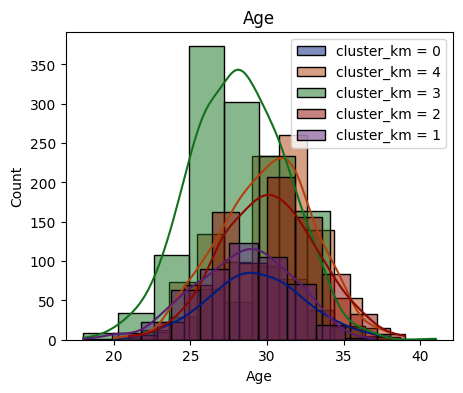

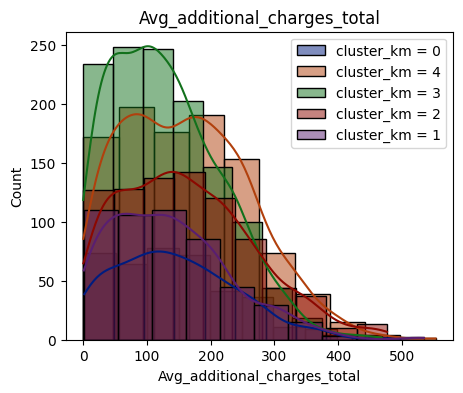

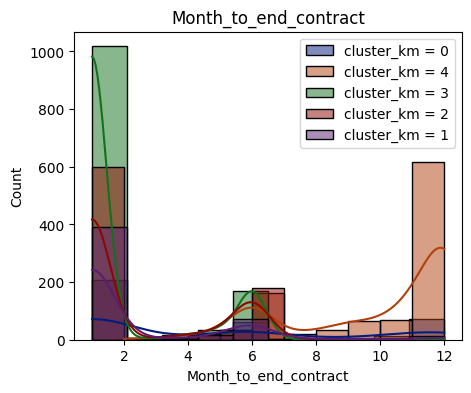

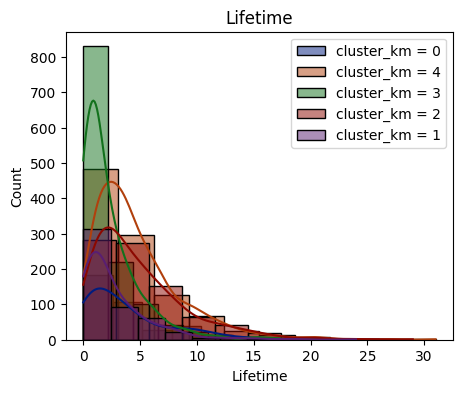

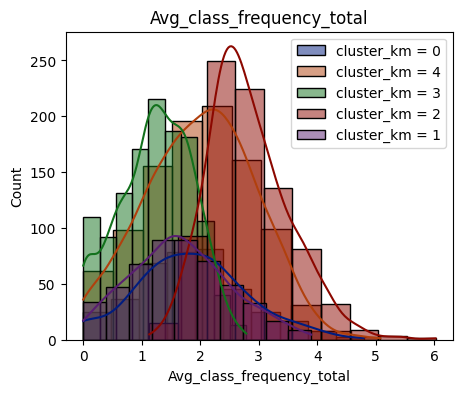

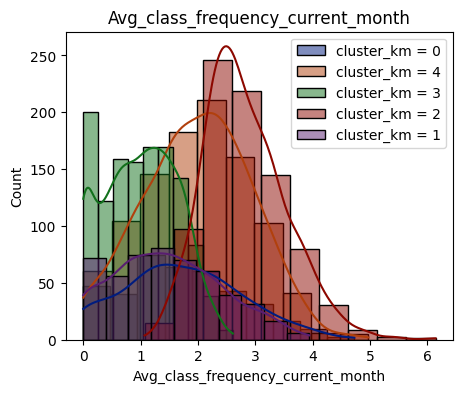

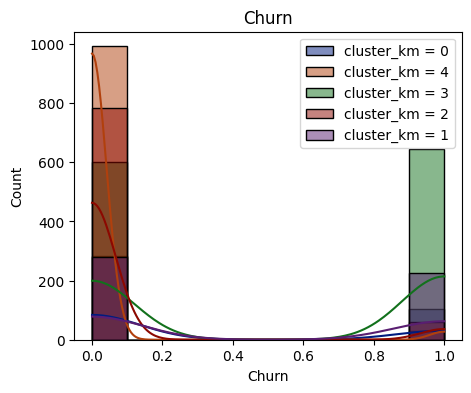

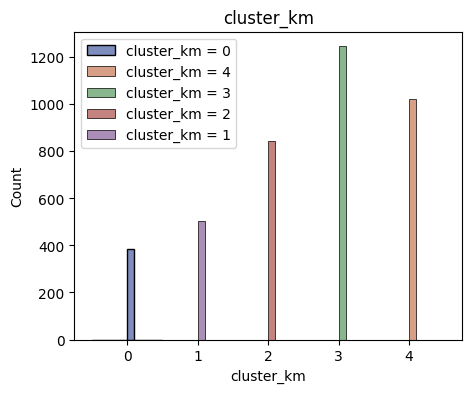

In [26]:
graficos(datos, 'cluster_km', datos.columns)

### 4.6 Calcular la tasa de cancelación para cada clúster.

In [27]:
# tasa de cancelación para cada clúster
churn_by_cluster = datos.groupby('cluster_km')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_cluster.columns = ['Total_clientes', 'Cancelaciones', 'Tasa_cancelacion']

In [28]:
churn_by_cluster

,Total_clientes,Cancelaciones,Tasa_cancelacion
cluster_km,,,
0,386,103,0.266839
1,505,224,0.443564
2,843,61,0.072361
3,1246,645,0.517657
4,1020,28,0.027451


Se puede observar que los grupos con **la mayor tasa de cancelacion** (*con los clientes mas propensos a irse*) son los **grupos 4 y 2** y los que tienen **la menor tasa de cancelacion** (*con los clientes mas leales*) son los de los **grupos 1 y 0**.

Esto refuerza las observaciones de los valores medios de las caracteristicas para cada grupo, donde los **grupos 0 y 1** tienen un promedio mayor en las caracteristicas **Lifetime**, **Contract_period**, **Avg_class_frequency_total** y **Age** que son caracterisiticas importantes para definir si una cliente es propenso a irse o a quedarse.

Por el contrario los **grupos 4 y 2** son los que tienen los valores mas bajos en estas caracteristicas clave.

## 5. Conclusiones y recomendaciones

Se observa que las caracteristicas claves a tener en cuenta para realizar retencion de clientes son:

- **Lifetime**
- **Contract_period**
- **Avg_class_frequency_total**
- **Age**
- **Near_Location**

Se podrian hacer estrategias de marketing como descuentos y promociones para los grupos de personas que tienen riesgo de cancelcion ya sea por que son muy nuevos, contrataron solo por 1 mes la suscripcion, van con poca frecuencia al gimnasio, son personas muy jovenes o su vivienda y lugar de trabajo estan lejos del GYM. A estos clientes se les podria prestar especial atencion y ofrecer ventajas que los anime a continuar.